In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.shape,y.shape

((891, 24), (891,))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()         #all values betwn 0 to 1
x_scaled=scaler.fit_transform(x)

In [8]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,random_state=56,stratify=y)
#strafify makes sure that the distribution of the target variable 
#is equal for both train and test datsets maening both datasets 
#will have equal proportions of positive and negative classes

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score    #f1 scre is the evaluation metrics here

In [11]:
clf=KNN(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
test_predict=clf.predict(x_test)
k=f1_score(test_predict,y_test)
print('Test F1Score ',k)

Test F1Score  0.674698795180723


In [30]:
#ELBOW FOR CLASSIFIER
#To find the value was k with minimum error

#create a function

def Elbow(K):
    #empty list
    test_error=[]
    for i in K:
        clf=KNN(n_neighbors = 1)
        clf.fit(x_train,y_train)
        tmp=clf.predict(x_test)
        tmp=f1_score(tmp,y_test)
        error=1-tmp
        test_error.append(error)
    return test_error
        

In [37]:
#define range
k=range(6,20,2)

In [38]:
test=Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for Test')

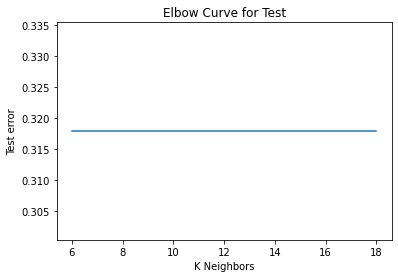

In [39]:
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for Test')

In [40]:
clf=KNN(n_neighbors=12)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [41]:
test_predict=clf.predict(x_test)
k=f1_score(test_predict,y_test)
print('Test F1Score ',k)

Test F1Score  0.7037037037037037
